Question 01

In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]

Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5
w1 = std*np.random.randn(Din, K)
b1 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
batch_size = Ntr
iterations =300
lr =1.4e-2

lr_decay=0.999
reg =5e-6
lr_history=[]
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    y_pred=np.dot(x_train,w1)+b1
    loss=1/Ntr*np.square(y_train-y_pred).sum()+reg*(np.sum(w1*w1))
    #print(loss)
    loss_history.append(loss)
    dy_pred= -2*(1/Ntr)*(y_train-y_pred)
    dw1=x_train.T.dot(dy_pred)+reg*w1
    #dw1 = 2*(1/Ntr)*(x_train.T.dot(y_pred - y_train))  + 2*reg*w1 
    w1 = w1 - lr*dw1
    I=np.ones((Ntr,1))
    db1=dy_pred.sum()
    #db1=2*(1/Ntr)*(I.T.dot(y_pred - y_train))
    b1=b1-lr*db1
    train_acc=accuracy(y_train,y_pred)
    train_acc_history.append(train_acc)
    valid_acc=accuracy(y_test,np.dot(x_test,w1)+b1)
    val_acc_history.append(valid_acc)
    if t==1 or t%30==0 or t==iterations-1:
          print("Epoch {:03} - Loss {:.4f} - Training Accuracy: {:.3f} - Validation Accuracy: {:.2f} - Learning Rate: {:.5f}"
              .format(t,loss,train_acc,valid_acc,lr))
        
    lr_history.append(lr)
    lr=lr*lr_decay


print('Finished')


x_train:  (50000, 32, 32, 3)
w1: (3072, 10)
b1: (10,)
Epoch 000 - Loss 1.0000 - Training Accuracy: 0.081 - Validation Accuracy: 0.25 - Learning Rate: 0.01400
Epoch 001 - Loss 0.9153 - Training Accuracy: 0.244 - Validation Accuracy: 0.30 - Learning Rate: 0.01399
Epoch 030 - Loss 0.8050 - Training Accuracy: 0.382 - Validation Accuracy: 0.38 - Learning Rate: 0.01359
Epoch 060 - Loss 0.7972 - Training Accuracy: 0.396 - Validation Accuracy: 0.39 - Learning Rate: 0.01318
Epoch 090 - Loss 0.7932 - Training Accuracy: 0.403 - Validation Accuracy: 0.40 - Learning Rate: 0.01279
Epoch 120 - Loss 0.7904 - Training Accuracy: 0.408 - Validation Accuracy: 0.40 - Learning Rate: 0.01242
Epoch 150 - Loss 0.7884 - Training Accuracy: 0.411 - Validation Accuracy: 0.40 - Learning Rate: 0.01205
Epoch 180 - Loss 0.7868 - Training Accuracy: 0.414 - Validation Accuracy: 0.40 - Learning Rate: 0.01169
Epoch 210 - Loss 0.7856 - Training Accuracy: 0.415 - Validation Accuracy: 0.40 - Learning Rate: 0.01135
Epoch 240 

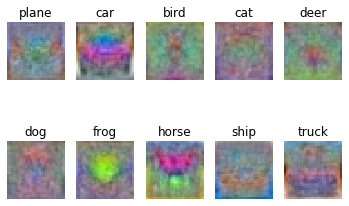

In [18]:
label = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images_weight=((w1-np.min(w1))/(np.max(w1)-np.min(w1)))*255
for i in range(K):
    plt.subplot(2,5,i+1)
    image=images_weight[:,i].reshape(32,32,3)
    plt.imshow(image.astype('uint8'))
    plt.title(label[i])
    plt.axis('off')

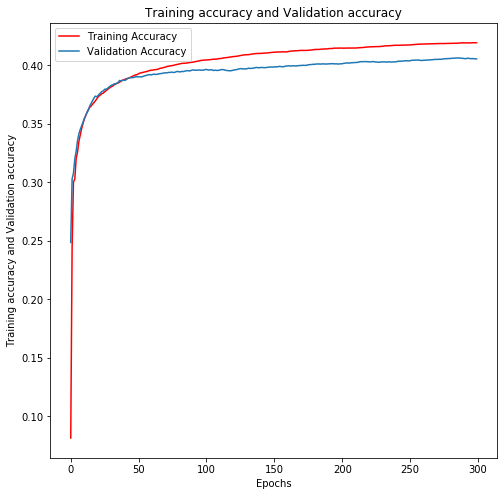

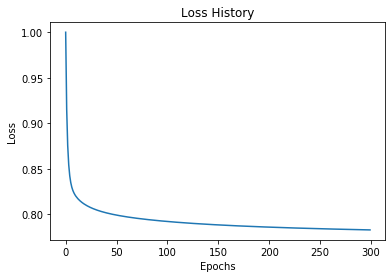

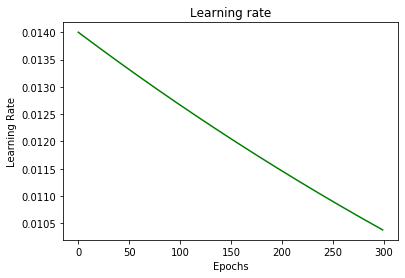

In [29]:
plt.figure(figsize=(8,8))
plt.plot(train_acc_history,color='red')

plt.plot(val_acc_history)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title("Training accuracy and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Training accuracy and Validation accuracy")
plt.show()

plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.plot(lr_history,'green')
plt.title("Learning rate")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.show()


In [30]:
print('Train Accuracy is ',train_acc)
print('Validation Accuracy is', valid_acc)
print('loss is',loss)

Train Accuracy is  0.41946
Validation Accuracy is 0.4056
loss is 0.7829014442315146


Question 02

In [35]:

def accuracy(y_ori,y_pred):
    count=0
    for i in range(len(y_ori)):
        max_t = max(list(y_ori[i]))
        max_true = list(y_ori[i]).index(max_t)
        max_p = max(list(y_pred[i]))
        max_pred = list(y_pred[i]).index(max_p)
        if max_true==max_pred:
            count+=1
    return count/len(y_ori)
#def d_sgn(x):
    #return sgn(x)*(1-sgn(x))
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
print(K)
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image


y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5

h=200
w1= std*np.random.randn(Din,h)
b1= np.zeros(h)
w2= std*np.random.rand(h,K)
b2= np.zeros(K)
batch_size = Ntr
iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6
lr_history=[]
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
test_loss_history=[]

for t in range(iterations):
    #foraward pass
    indices= np.random.choice(Ntr, batch_size)
    x= x_train[indices]
    y= y_train[indices]
    h = 1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred = h.dot(w2)+b2
    loss = np.sum((y_pred-y)**2)*(1./Ntr) + reg*(np.sum(w2**2)) + reg*(np.sum(w1**2))
    loss_history.append(loss)
    #backward propagation
    dy_pred = (y_pred-y)*2*(1/Ntr)
    dw2 = h.T.dot(dy_pred) + reg*w2
    db2 = dy_pred.sum(axis=0)
    dh = dy_pred.dot(w2.T)
    dw1 = x.T.dot(dh*h*(1-h)) + reg*w1
    db1 = (dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    w2 -= lr*dw2
    b1 -= lr*db1
    b2 -= lr*db2
    #Accuracy computation
    train_acc = accuracy(y, y_pred)
    train_acc_history.append(train_acc)
    h_test= 1.0/(1.0+np.exp(-(x_test.dot(w1)+b1)))
    y_pred_test= h_test.dot(w2)+b2
    val_acc = accuracy(y_test, y_pred_test)
    val_acc_history.append(val_acc)
    if t%30==0 or t==1 or  t==iterations-1:
        print("Epoch {:03} - Train loss {:.4f} - Training Accuracy: {:.3f} - Validation Accuracy: {:.2f} - Learning rate: {:.5f}"
          .format(t,loss,train_acc,val_acc,lr))
    lr_history.append(lr)
    lr*= lr_decay

x_train:  (50000, 32, 32, 3)
10
Epoch 000 - Train loss 0.9990 - Training Accuracy: 0.103 - Validation Accuracy: 0.10 - Learning rate: 0.01400
Epoch 001 - Train loss 0.9182 - Training Accuracy: 0.099 - Validation Accuracy: 0.10 - Learning rate: 0.01399
Epoch 030 - Train loss 0.8364 - Training Accuracy: 0.291 - Validation Accuracy: 0.29 - Learning rate: 0.01359
Epoch 060 - Train loss 0.8127 - Training Accuracy: 0.347 - Validation Accuracy: 0.35 - Learning rate: 0.01318
Epoch 090 - Train loss 0.8025 - Training Accuracy: 0.360 - Validation Accuracy: 0.36 - Learning rate: 0.01279
Epoch 120 - Train loss 0.7867 - Training Accuracy: 0.386 - Validation Accuracy: 0.38 - Learning rate: 0.01242
Epoch 150 - Train loss 0.7676 - Training Accuracy: 0.416 - Validation Accuracy: 0.41 - Learning rate: 0.01205
Epoch 180 - Train loss 0.7578 - Training Accuracy: 0.435 - Validation Accuracy: 0.42 - Learning rate: 0.01169
Epoch 210 - Train loss 0.7576 - Training Accuracy: 0.430 - Validation Accuracy: 0.41 - L

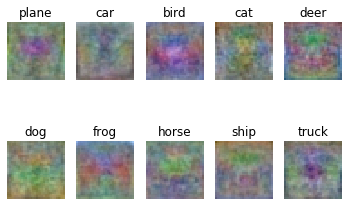

In [36]:
label = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images_weight=((w1-np.min(w1))/(np.max(w1)-np.min(w1)))*255
for i in range(K):
    plt.subplot(2,5,i+1)
    image=images_weight[:,i].reshape(32,32,3)
    plt.imshow(image.astype('uint8'))
    plt.title(label[i])
    plt.axis('off')

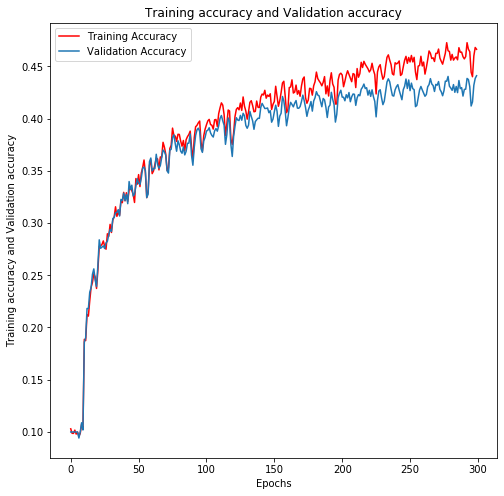

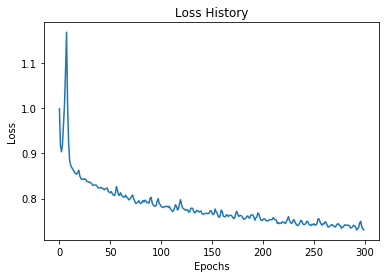

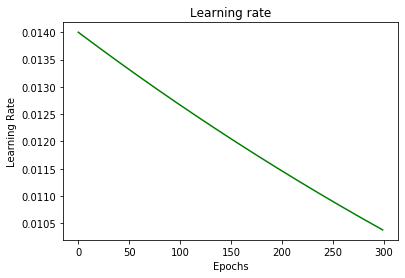

In [37]:
plt.figure(figsize=(8,8))
plt.plot(train_acc_history,color='red')

plt.plot(val_acc_history)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title("Training accuracy and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Training accuracy and Validation accuracy")
plt.show()

plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()
plt.plot(lr_history,'green')
plt.title("Learning rate")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.show()


In [38]:
print('Train Accuracy is ',train_acc)
print('Validation Accuracy is', valid_acc)
print('loss is',loss)

Train Accuracy is  0.46628
Validation Accuracy is 0.4056
loss is 0.7306600820730622


In [59]:

def accuracy(y,y_pred):
    count=np.sum([np.argmax(y_pred,axis=1)==np.argmax(y,axis=1)])
    return (count/len(np.argmax(y,axis=1)))
#def d_sgn(x):
    #return sgn(x)*(1-sgn(x))
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
print(K)
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
#x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image


y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
std=1e-5

H=200
w1= std*np.random.randn(Din,H)
b1= np.zeros(H)
w2= std*np.random.rand(H,K)
b2= np.zeros(K)

H=200
batch_size = 500
iterations = 300
lr = 1.4e-2
lr_decay= 0.999
reg = 5e-6



lr_history=[]
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)


for t in range(iterations):
    for batches in range(round(Ntr/batch_size)):
        #forward propagation
        indices = np.array(range((batches*batch_size),((batches+1)*batch_size)))
        rng.shuffle(indices)
        x=x_train[indices]
        y=y_train[indices]y_=x.dot(w1)+b1
        h = 1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
        y_pred=h.dot(w2)+b2
        loss = (1/batch_size)*((y_pred-y)**2).sum() + reg*(np.sum(w2**2)) + reg*(np.sum(w1**2))
        #backward propagation
        dy_pred=1/batch_size*(-2)*(y-y_pred)
        dw2=h.T.dot(dy_pred)+reg*w2
        db2=dy_pred.sum(axis=0)
        dh=dy_pred.dot(w2.T)
        dw1=x.T.dot(dh*h*(1-h))+reg*w1
        db1=(dh*h*(1-h)).sum(axis=0)
        w1-=lr*dw1
        w2-=lr*dw2
        b1-=lr*db1
        b2-=lr*db2 
        lr=lr*lr_decay
    loss_history.append(loss)
    y_pred_test= h_test.dot(w2)+b2
    val_acc = accuracy(y_test, y_pred_test)
    train_acc=accuracy(y_train,y_pred)
    train_acc_history.append(train_acc)
    lr_history.append(lr)
    val_acc_history.append(val_acc)
    if t%30==0 or t==1 or  t==iterations-1:
        print("Epoch {:03} - Train loss {:.4f} - Training Accuracy: {:.3f} - Validation Accuracy: {:.2f}"
                  .format(t,loss,train_acc,val_acc))
    

print('Finished')


x_train:  (50000, 32, 32, 3)
10
Epoch 000 - Train loss 0.7902 - Training Accuracy: 0.385 - Validation Accuracy: 0.38
Epoch 001 - Train loss 0.7661 - Training Accuracy: 0.417 - Validation Accuracy: 0.41
Epoch 030 - Train loss 0.5992 - Training Accuracy: 0.620 - Validation Accuracy: 0.46
Epoch 060 - Train loss 0.5896 - Training Accuracy: 0.647 - Validation Accuracy: 0.46
Epoch 090 - Train loss 0.5887 - Training Accuracy: 0.647 - Validation Accuracy: 0.47
Epoch 120 - Train loss 0.5887 - Training Accuracy: 0.647 - Validation Accuracy: 0.47
Epoch 150 - Train loss 0.5887 - Training Accuracy: 0.647 - Validation Accuracy: 0.47
Epoch 180 - Train loss 0.5887 - Training Accuracy: 0.647 - Validation Accuracy: 0.47
Epoch 210 - Train loss 0.5887 - Training Accuracy: 0.647 - Validation Accuracy: 0.47
Epoch 240 - Train loss 0.5887 - Training Accuracy: 0.647 - Validation Accuracy: 0.47
Epoch 270 - Train loss 0.5887 - Training Accuracy: 0.647 - Validation Accuracy: 0.47
Epoch 299 - Train loss 0.5887 - T

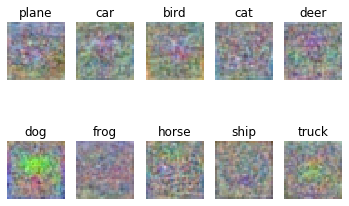

In [60]:
label = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
images_weight=((w1-np.min(w1))/(np.max(w1)-np.min(w1)))*255
for i in range(K):
    
    plt.subplot(2,5,i+1)
    image=images_weight[:,i].reshape(32,32,3)
    plt.imshow(image.astype('uint8'))
    plt.title(label[i])
    plt.axis('off')

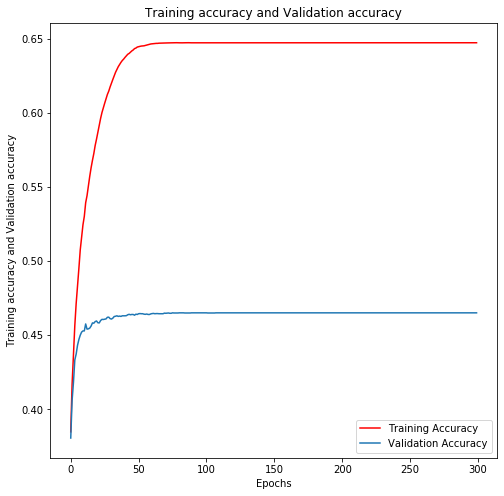

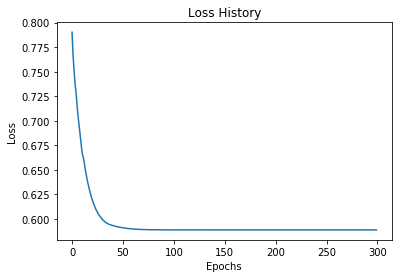

In [63]:
plt.figure(figsize=(8,8))
plt.plot(train_acc_history,color='red')

plt.plot(val_acc_history)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title("Training accuracy and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Training accuracy and Validation accuracy")
plt.show()

plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()





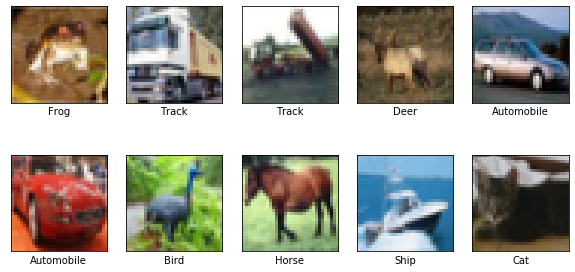

In [1]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
classes=['Airplane','Automobile','Bird','Cat','Deer','Dog','Frog','Horse','Ship','Track']


x_train = x_train / 255.
x_test = x_test / 255.
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap = plt.cm.binary)
    plt.xlabel(classes[y_train[i][0]])
plt.show()

x_train = x_train.reshape((50000, 32, 32, 3))
x_test = x_test.reshape((10000, 32, 32, 3))



model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))



In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

In [3]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.014, momentum = 0.09)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer= sgd,
              metrics=["accuracy"])
model_history = model.fit(x_train, y_train, epochs=30,batch_size= 50,
                    validation_data=(x_test, y_test))

Epoch 1/30
1000/1000 [==============================] - 69s 68ms/step - loss: 2.1706 - accuracy: 0.2032 - val_loss: 1.7788 - val_accuracy: 0.3611
Epoch 2/30
1000/1000 [==============================] - 69s 69ms/step - loss: 1.6763 - accuracy: 0.4008 - val_loss: 1.4843 - val_accuracy: 0.4692
Epoch 3/30
1000/1000 [==============================] - 73s 73ms/step - loss: 1.4725 - accuracy: 0.4716 - val_loss: 1.3634 - val_accuracy: 0.5127
Epoch 4/30
1000/1000 [==============================] - 72s 72ms/step - loss: 1.3326 - accuracy: 0.5261 - val_loss: 1.2404 - val_accuracy: 0.5618
Epoch 5/30
1000/1000 [==============================] - 72s 72ms/step - loss: 1.2350 - accuracy: 0.5577 - val_loss: 1.1577 - val_accuracy: 0.5900
Epoch 6/30
1000/1000 [==============================] - 73s 73ms/step - loss: 1.1473 - accuracy: 0.5959 - val_loss: 1.1320 - val_accuracy: 0.5963
Epoch 7/30
1000/1000 [==============================] - 77s 77ms/step - loss: 1.0715 - accuracy: 0.6237 - val_loss: 1.0814 -

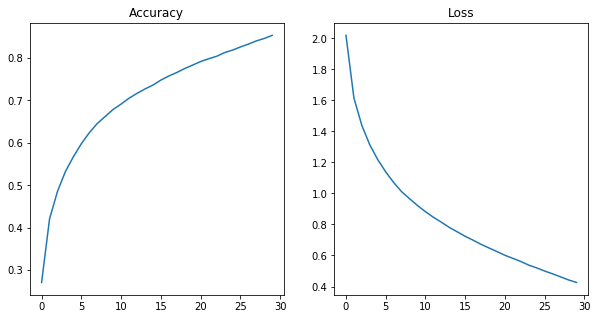

In [7]:

fig,ax=plt.subplots(1,2,figsize=(10,5))
ax[0].plot(model_history.history['accuracy'],label ='accuracy')
ax[0].set_title('Accuracy')
print('\n')
ax[1].plot(model_history.history['loss'],label ='loss')
ax[1].set_title('Loss')

plt.show()


In [8]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print('Test Accuracy- ',test_accuracy)
print('Test loss- ',test_loss)

313/313 [==============================] - 4s 12ms/step - loss: 0.9700 - accuracy: 0.7098
Test Accuracy-  0.7098000049591064
Test loss-  0.9700005054473877
